In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def distribucion_objetivo(x):
    return np.exp(-(x - 2)**2 / (2 * 0.5**2))


Definimos la distribución objetivo, que representa la función de densidad de probabilidad (PDF) de la distribución normal de la cual queremos obtener muestras. En este caso, nuestra distribución objetivo es una distribución normal con media μ = 2 y desviación estándar σ = 0.5.

La función `distribucion_objetivo(x)` toma un valor `x` como entrada y devuelve la densidad de probabilidad de la distribución objetivo en ese punto. Utilizaremos esta función más adelante en el algoritmo de Metropolis para evaluar la proporción de aceptación.


In [3]:
def algoritmo_metropolis(n_iteraciones, x_inicial, desviacion_propuesta):
    muestras = [x_inicial]
    x_actual = x_inicial

    for _ in range(n_iteraciones):
        x_propuesto = np.random.normal(
            x_actual, desviacion_propuesta
        )  # Distribución propuesta utilizando una distribución normal
        proporcion_aceptacion = min(
            1,
            distribucion_objetivo(x_propuesto) /
            distribucion_objetivo(x_actual))

        if np.random.uniform() < proporcion_aceptacion:
            x_actual = x_propuesto

        muestras.append(x_actual)

    return muestras


In [4]:
n_iterations = 10000
initial_x = 0  # Valor inicial para x
proposal_sd = 1  # Desviación estándar de la distribución propuesta

samples = algoritmo_metropolis(n_iterations, initial_x, proposal_sd)


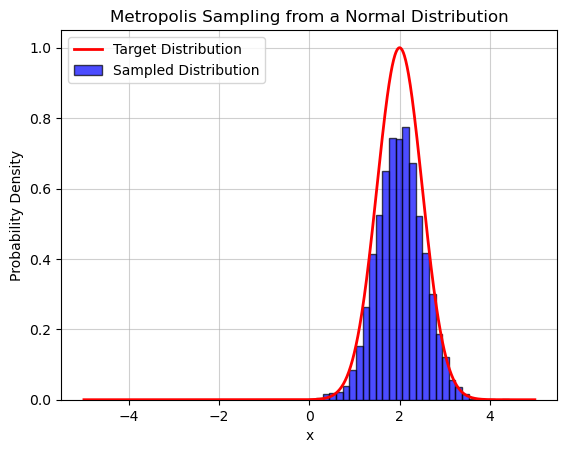

In [5]:
# Plot the sampled distribution
plt.figure()
plt.hist(samples,
         bins=30,
         density=True,
         alpha=0.7,
         color='b',
         edgecolor='black', zorder=2)
x_values = np.linspace(-5, 5, 1000)
plt.plot(x_values, distribucion_objetivo(x_values), 'r', linewidth=2, zorder=3)
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Metropolis Sampling from a Normal Distribution')
plt.legend(['Target Distribution', 'Sampled Distribution'])
plt.grid(True, alpha=0.6, zorder=1)
plt.show()
